This notebook is a sequel to all other preprocessing techniques i carry out when working with data, you can find the other repos at [Oluwatobi's Github](https://github.com/BetikuOluwatobi?tab=repositories)

Dealing with missing values is an important step in the preprocessing of datasets. When working with real-world datasets, it's common to encounter missing values. These missing values can arise due to various reasons such as errors during data collection, human errors, or just the absence of certain values. We typically see missing values as the blank spaces in our data table or as placeholder strings such as NaN, which stands for not a number, or NULL (a commonly used indicator of unknown values in relational databases).

Handling missing values is crucial as it can affect the quality and accuracy of the data analysis and modeling. Here are some commonly used methods i follow when dealing with missing values in datasets:

* Identifying missing values
* Eliminating samples or features with missing values
* Imputing missing values

To start i'll load in the libraries and datasets we'll be using. For this notebook, I'll be using the Spaceship Titanic dataset(A competition hosted on kaggle for learning machine learning where the task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly)).

In [2]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 54.2 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 165.0 kB/s eta 0:00:00a 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77716 sha256=1996dce28b2afce4ccc72c362172e9b26130ccc7e4b5e5dfc65c2872325d7c6a
  Stored in directory: /root/.cache/pip/wheels/f3/16/ff/34e7d368370d4fd68bb749a59f1d2639ed66f3c14358e340a1
Successfully built kaggle

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [7]:
import kaggle

In [10]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [11]:
api = KaggleApi()

In [12]:
api.authenticate()

In [39]:
api.competition_download_file(competition='spaceship-titanic',file_name='train.csv',path='data/')
api.competition_download_file(competition='spaceship-titanic',file_name='test.csv',path='data/')

2023-05-02 11:55:02,110 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))': /api/v1/competitions/data/download/spaceship-titanic/train.csv
2023-05-02 11:55:03,078 WARNING Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))': /kagglesdsdata/competitions/34377/3220602/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1683291285&Signature=ROc2rs0UblYOj9tWnjxeigVcWwnIOzJn2%2FfiNZuLvGRQEf9HaTOYprMrwP5z2YIDbm6ZnXiNXRAeHz1HwF0ZP2hOhDgcTtMnusDkI6hiPfDA%2BS8GUXPd19qfRRXbsVxxfrBL55BiSq94TCgK9jIxV%2BvZa5sGYoK3SRyZWQ09CW%2BQHsuN6repJHCAX5Bg8GgsHLquPozCPHRQoae7iWxjh%2BmNCjoC0dt9N3NeH6tKPl%2BiJfyIP%2BlUmbP6BoU1mukzRrLA8ZmMa5jEMr5Gru9OuxNwmRn%2F

100%|██████████| 787k/787k [00:00<00:00, 811kB/s]


100%|██████████| 364k/364k [00:00<00:00, 996kB/s] 

### Dataset Features:

Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## Step 1:
### Identifying missing values in tabular data

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
train_df = pd.read_csv('data/train.csv')

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


From a quick insight into this dataset information, we can make the following observations:

The dataset has 8693 entries and 14 columns.
There are several columns with missing values, including HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, and Name.
The columns HomePlanet, CryoSleep, Cabin, Destination, VIP, and Name are of object data type, while the columns Age, RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck are of float data type.
The column `Transported` is of bool data type.
The PassengerId column is not included in the count of non-null values, which suggests that it may be a unique identifier for each passenger and may not be relevant to the analysis.
Based on these observations, it appears that some data cleaning and preprocessing may be necessary to handle the missing values and ensure the data is ready for analysis. The specific techniques for handling missing values will depend on the nature of the data and the goals of the analysis, we will explore some of this techniques in this notebook. Additionally, we may need to further investigate the meaning and relevance of some of the columns, such as the VIP and Transported columns, to determine how they should be treated in the analysis.

For a large DataFrame as the Spaceship Titanic dataset, we can use the `isnull` method to return a DataFrame with Boolean values that indicate whether a cell contains a numeric value (False) or if data is missing (True). 

In [48]:
train_df.isnull()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8689,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8690,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8691,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Using the `sum` method, we can calculate the total missing values for each column

In [50]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

From the output of train_df.isnull().sum(), we can deduce that:

* The dataset has a column named "PassengerId" which has no missing values.
* There are several columns with missing values, including "HomePlanet", "CryoSleep", "Cabin", "Destination", "Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", and "Name".
* The number of missing values for each column is shown in the output, with "HomePlanet" having the most missing values (201) and "Age" having the second most missing values (179).


<Axes: >

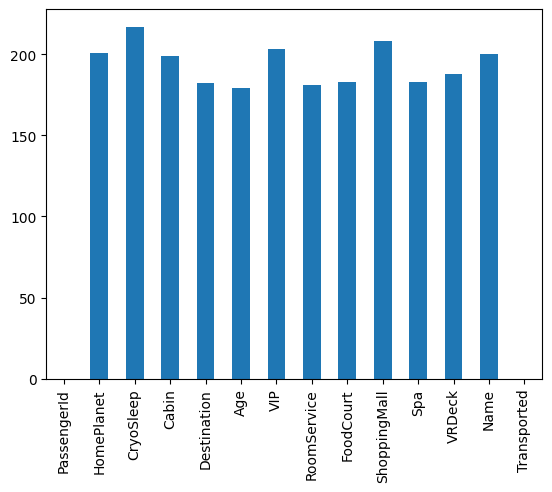

In [54]:
train_df.isna().sum().plot(kind='bar')

We can also get the percentage of missing values for each column

In [56]:
train_df.isnull().sum()/len(train_df) * 100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

From the output:

* The percentage of missing values for each column is shown in the output, with "HomePlanet" having the highest percentage of missing values (2.31%) and "Transported" having no missing values (0%).

Overall, the percentage of missing values in the dataset is relatively low, with most columns having less than 2.5% missing values.

In [57]:
!pip install missingno


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


The `missingno` library in Python can help with the analysis of the dataset by providing visualizations that help to identify patterns and relationships in the missing values.

In [58]:
import missingno as msno

Let's create a `matrix` of the missing values in the dataset using the matrix function

<Axes: >

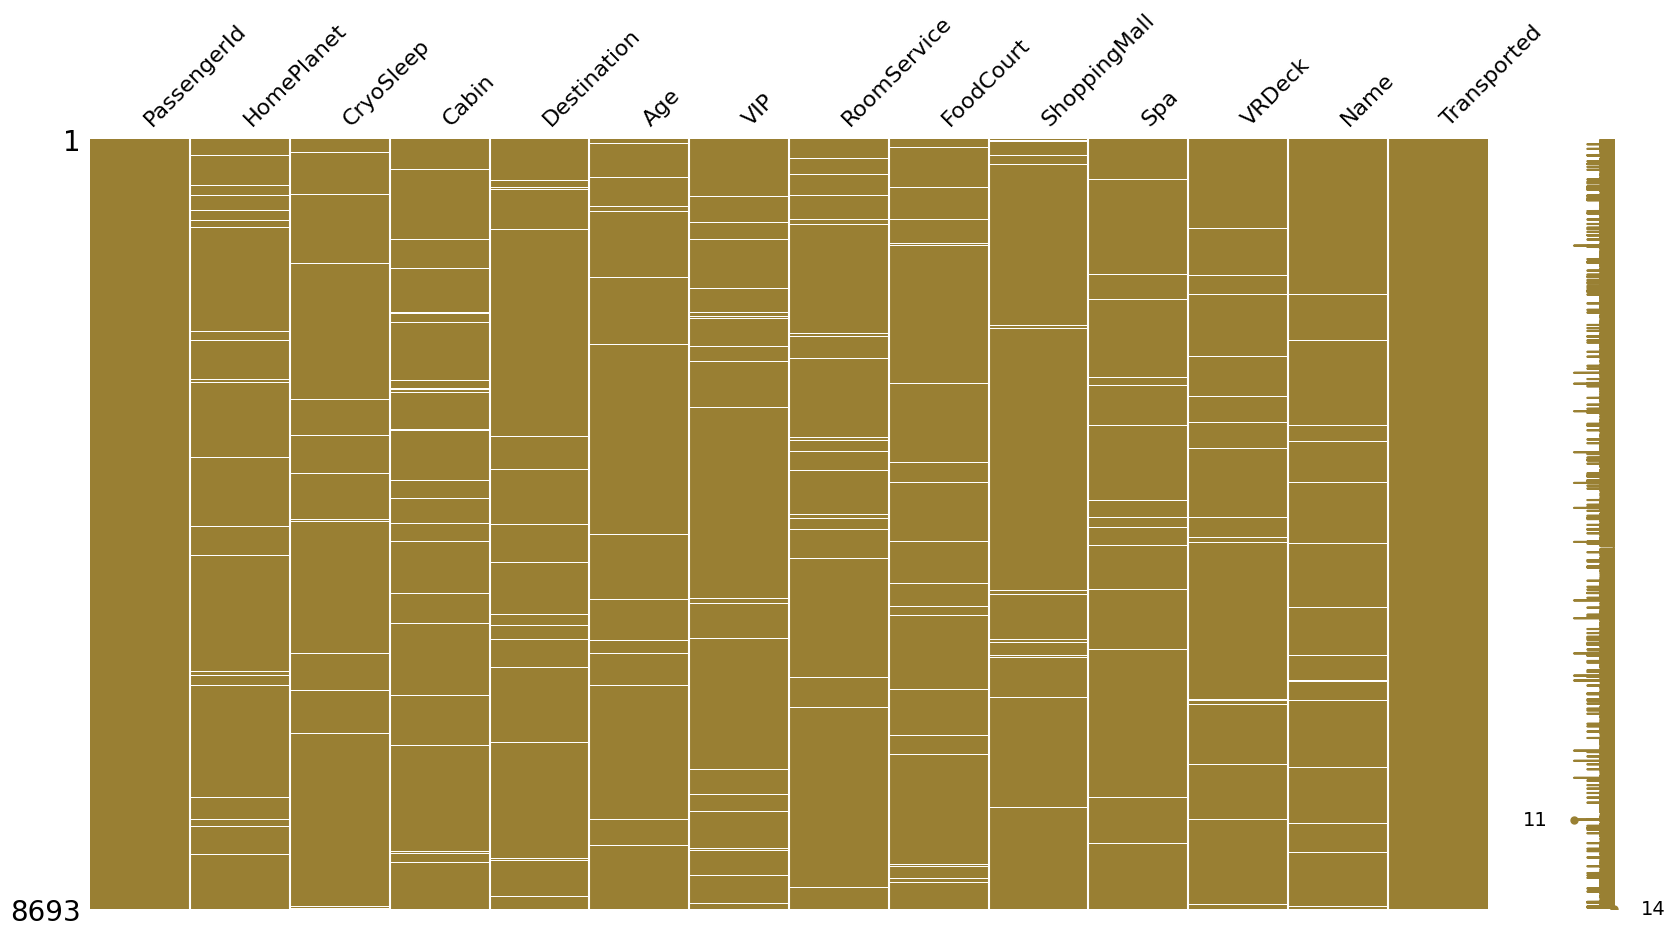

In [73]:
msno.matrix(train_df,figsize=(20, 10),
    color=(0.60, 0.50, 0.2))

<Axes: >

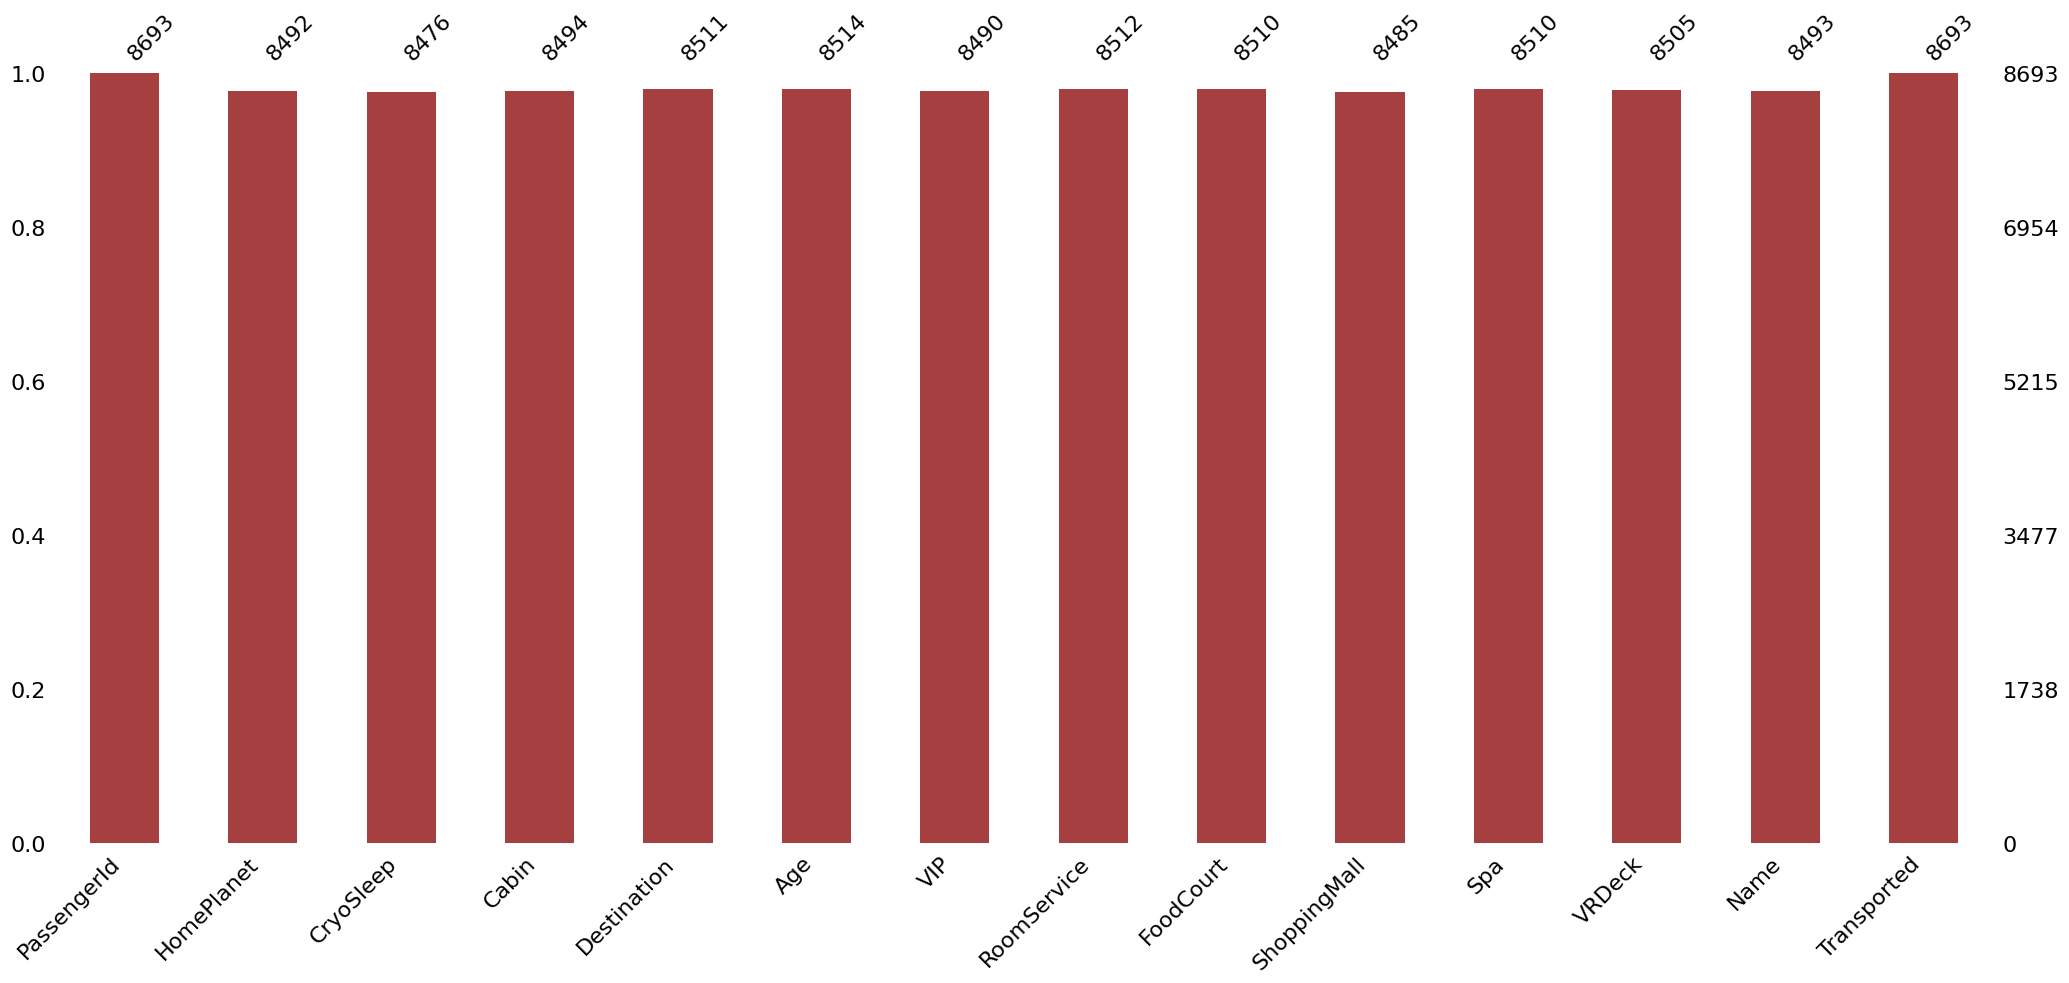

In [77]:
msno.bar(train_df,color=(0.65, 0.25, 0.25))

`Missingno` also provides a function called heatmap that creates a correlation heatmap of the missing values in the dataset. This heatmap can help to identify correlations between missing values in different columns, which can provide insights into the underlying causes of missingness in the data

<Axes: >

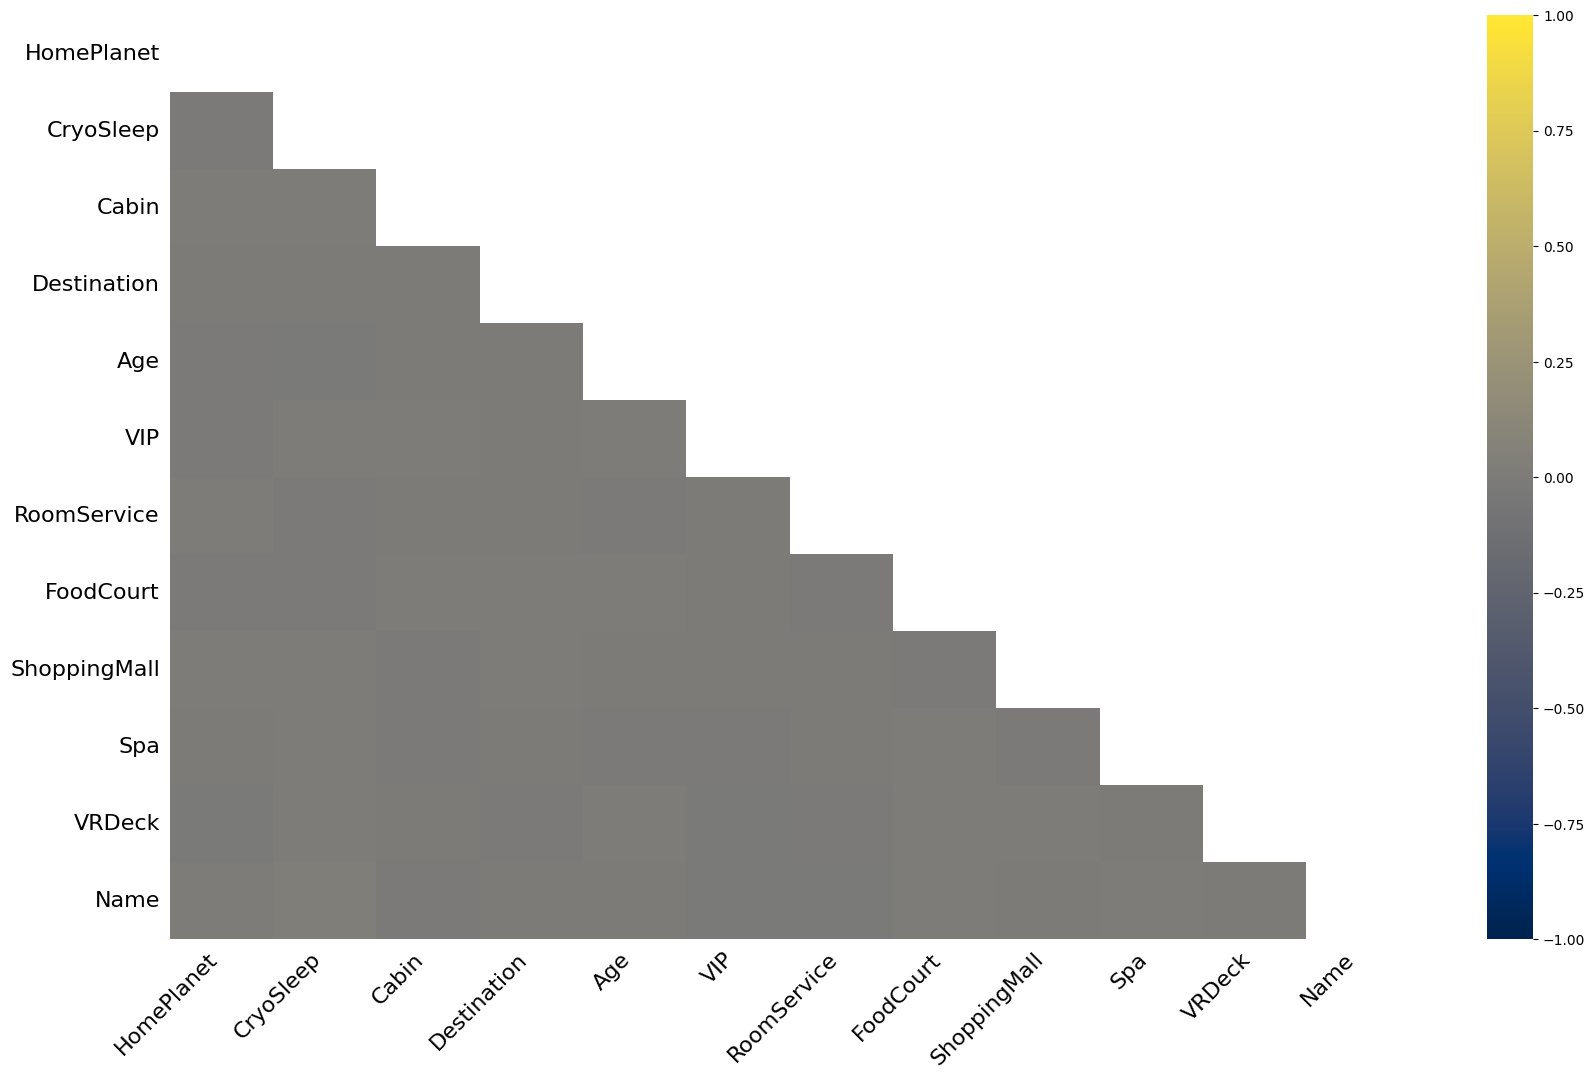

In [79]:
msno.heatmap(train_df,cmap='cividis',)

<Axes: >

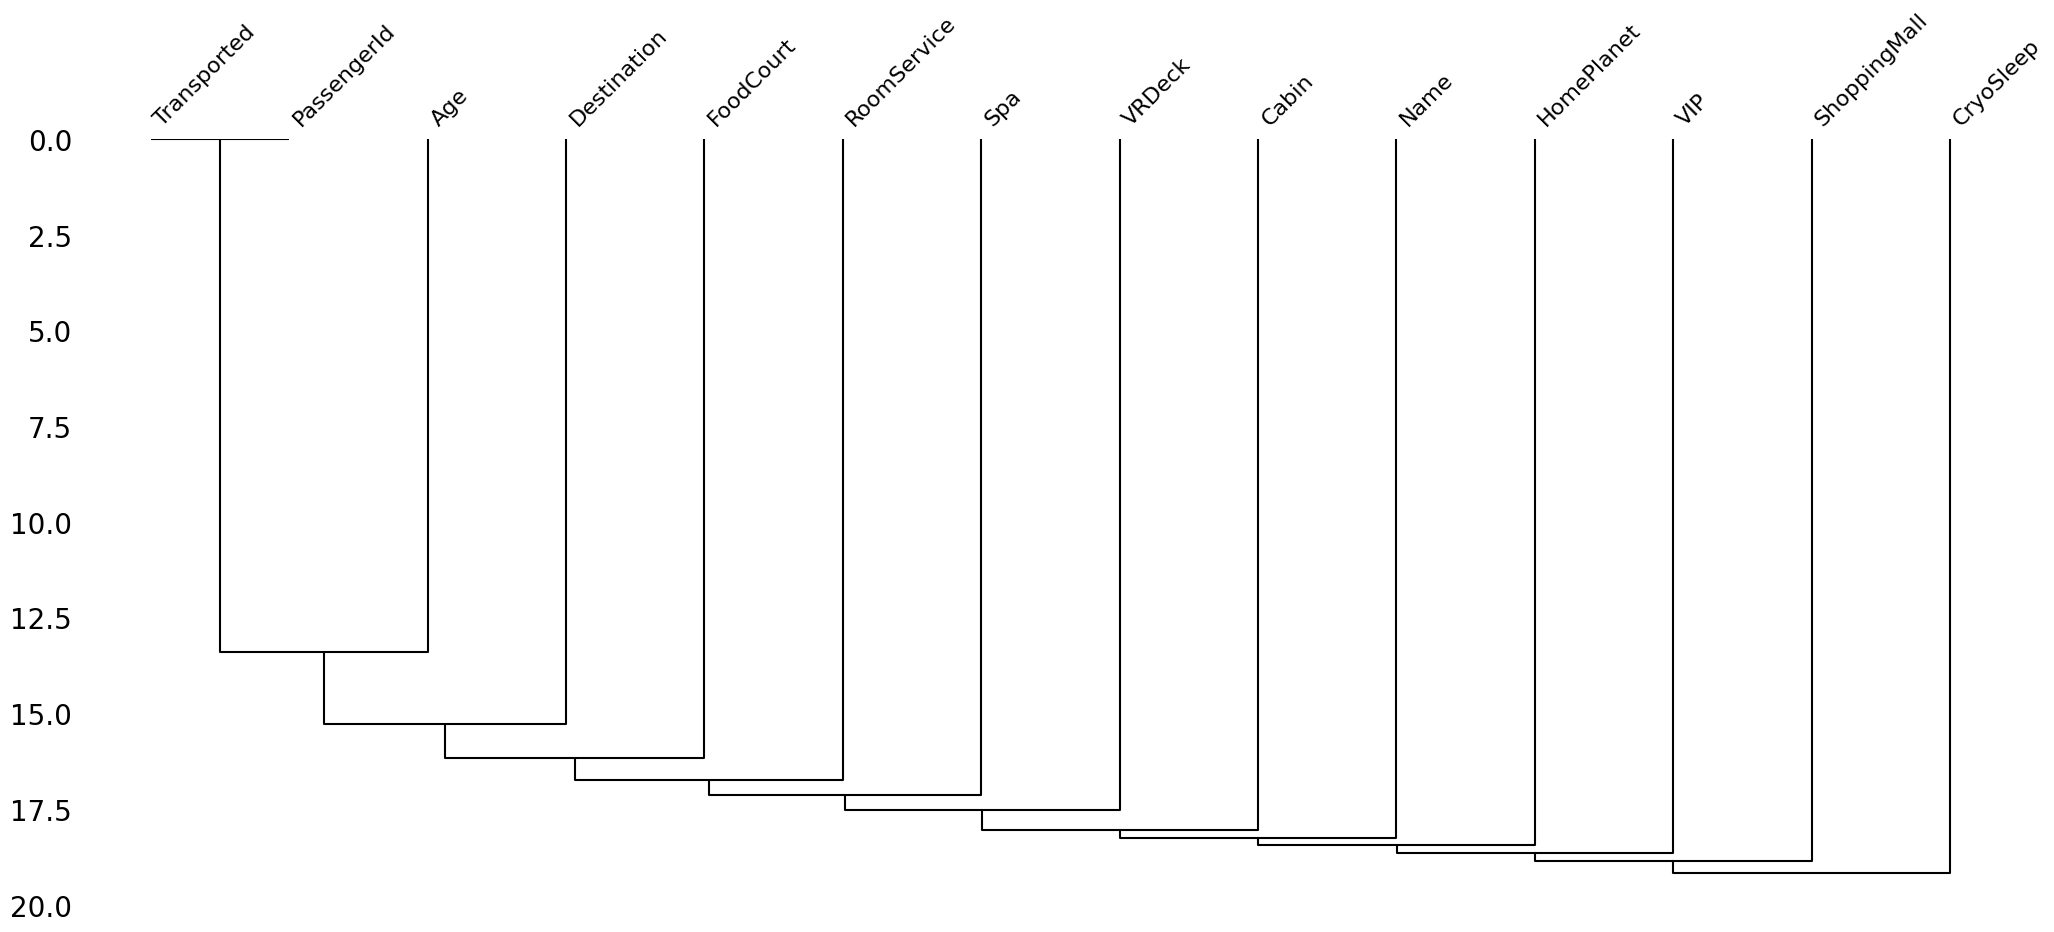

In [80]:
msno.dendrogram(train_df)

Overall, the presence of missing values in the dataset highlights the importance of properly handling missing values during data preprocessing. Some common strategies for dealing with missing values include imputation, removal of missing values, or treating missing values as a separate category in categorical columns. The choice of strategy will depend on the nature of the missing data and the goals of the analysis.